<a href="https://colab.research.google.com/github/SarinaMashreghi/ML-notebooks/blob/main/SkimLit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##data

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b0924bab-c118-efc4-9370-62af562d4932)


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 12.53 MiB/s, done.


In [ ]:
!ls pubmed-rct

PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [ ]:
data_dir = "/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign"

import os
file_names = [data_dir+"/"+filename for filename in os.listdir(data_dir)]
file_names

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
valid_dir = file_names[0]
test_dir = file_names[1]
train_dir = file_names[2]

##preprocessing

In [ ]:
def read_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [ ]:
valid_text = read_lines(valid_dir)
test_text = read_lines(test_dir)
train_text = read_lines(train_dir)

In [ ]:
len(train_text), train_text[:20]

(210040,
 ['###24293578\n',
  'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
  'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
  'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
  'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
  'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
  'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor 

In [ ]:
train_text[1].index("\t")

9

In [ ]:
def info_extractor(filename):

  text = read_lines(filename)

  dict_list = []

  current_dict = {}
  abstract_id = ""
  abstract_lines = ""
  for line in text:
    if line[0]=="#":
      abstract_id = line[3:-1]
      abstract_lines = ""
    elif line.isspace():
      abstract_lines = abstract_lines.splitlines()
      for line_number, abs_line in enumerate(abstract_lines):
        current_dict["line_num"] = line_number
        split_ind = abs_line.index("\t")
        # print(split_ind)
        current_dict["target"] = abs_line[:split_ind]
        current_dict["text"] = abs_line[split_ind+1:-1]
        current_dict["id"] = abstract_id
        current_dict["total_lines"] = len(abstract_lines)
        dict_list.append(current_dict)
        current_dict = {}

    else:
      abstract_lines += line

  return dict_list



In [ ]:
info_extractor(valid_dir)

[{'line_num': 0,
  'target': 'BACKGROUND',
  'text': 'IgE sensitization to Aspergillus fumigatus and a positive sputum fungal culture result are common in patients with refractory asthma ',
  'id': '24290286',
  'total_lines': 10},
 {'line_num': 1,
  'target': 'BACKGROUND',
  'text': 'It is not clear whether these patients would benefit from antifungal treatment ',
  'id': '24290286',
  'total_lines': 10},
 {'line_num': 2,
  'target': 'OBJECTIVE',
  'text': 'We sought to determine whether a @-month course of voriconazole improved asthma-related outcomes in patients with asthma who are IgE sensitized to A fumigatus ',
  'id': '24290286',
  'total_lines': 10},
 {'line_num': 3,
  'target': 'METHODS',
  'text': 'Asthmatic patients who were IgE sensitized to A fumigatus with a history of at least @ severe exacerbations in the previous @ months were treated for @ months with @ mg of voriconazole twice daily , followed by observation for @ months , in a double-blind , placebo-controlled , ran

In [ ]:
import pandas as pd
train_df = pd.DataFrame(info_extractor(train_dir)) 
valid_df = pd.DataFrame(info_extractor(valid_dir)) 
test_df = pd.DataFrame(info_extractor(test_dir)) 

In [ ]:
train_df.head(20)

,line_num,target,text,id,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,24293578,12
1,1,METHODS,A total of @ patients with primary knee OA wer...,24293578,12
2,2,METHODS,Outcome measures included pain reduction and i...,24293578,12
3,3,METHODS,Pain was assessed using the visual analog pain...,24293578,12
4,4,METHODS,Secondary outcome measures included the Wester...,24293578,12
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",24293578,12
6,6,RESULTS,There was a clinically relevant reduction in t...,24293578,12
7,7,RESULTS,The mean difference between treatment arms ( @...,24293578,12
8,8,RESULTS,"Further , there was a clinically relevant redu...",24293578,12
9,9,RESULTS,These differences remained significant at @ we...,24293578,12


In [ ]:
train_df["target"].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

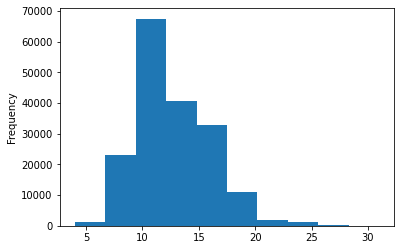

In [ ]:
train_df["total_lines"].plot.hist()

In [ ]:
train_sents = train_df["text"].to_list()
valid_sents = valid_df["text"].to_list()
test_sents = test_df["text"].to_list()
len(train_sents), len(valid_sents), len(test_sents)

(180040, 30212, 30135)

###label encoding

In [ ]:
train_labels = train_df["target"].to_numpy()
valid_labels = valid_df["target"].to_numpy()
test_labels = test_df["target"].to_numpy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_oh = one_hot_encoder.fit_transform(train_labels.reshape(-1,1))
train_labels_oh

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
import tensorflow as tf

tf.constant(train_labels_oh)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

In [ ]:
valid_labels_oh = one_hot_encoder.transform(valid_labels.reshape(-1,1))
test_labels_oh = one_hot_encoder.transform(valid_labels.reshape(-1,1))

In [ ]:
valid_labels_oh.shape

(30212, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
valid_labels_encoded = le.transform(valid_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes = len(le.classes_)
class_names = le.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation(y_true, y_pred):
  eval = {}
  eval["accuracy"] = accuracy_score(y_true, y_pred)
  eval["f1"] = f1_score(y_true, y_pred, average="weighted")
  eval["precision"] = precision_score(y_true, y_pred, average="weighted")
  eval["recall"] = recall_score(y_true, y_pred, average="weighted")

  return eval

##baseline: Naive Bayes - tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_nb = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_nb.fit(train_sents, train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
model_nb.score(valid_sents, valid_labels_encoded)

0.7218323844829869

In [ ]:
from sklearn.metrics import accuracy_score
preds = model_nb.predict(test_sents)
nb_results = evaluation(test_labels_encoded, preds)
nb_results

{'accuracy': 0.7165754106520658,
 'f1': 0.6923617835490259,
 'precision': 0.7121336995149758,
 'recall': 0.7165754106520658}

##Tokenization

In [ ]:
max_len = max([len(i.split()) for i in train_sents])
min_len = min([len(i.split()) for i in train_sents])
avg_len = int(sum([len(i.split()) for i in train_sents])/len(train_sents))
max_len, min_len, avg_len

(295, 0, 25)

In [ ]:
sents_len = [len(i.split()) for i in train_sents]
seq_len = int(np.percentile(sents_len, 95))
seq_len

54

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 68000
vectorizer_layer = TextVectorization(max_tokens=max_vocab_length,
                                    output_sequence_length=seq_len)

In [ ]:
vectorizer_layer.adapt(train_sents)

In [ ]:
import random

rand_sent = random.choice(train_sents)
print(rand_sent)
vectorizer_layer([rand_sent])

THC/CBD spray was well tolerated and no new safety concerns were identified 


<tf.Tensor: shape=(1, 54), dtype=int64, numpy=
array([[17799,  3023,    10,   221,   580,     3,    33,   319,   136,
         1713,     9,   526,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]])>

In [ ]:
vocab_list = vectorizer_layer.get_vocabulary()
len(vocab_list), vocab_list[:10]

(64884, ['', '[UNK]', 'the', 'and', 'of', 'in', 'to', 'with', 'a', 'were'])

In [ ]:
vectorizer_layer.get_config()

{'name': 'text_vectorization_2',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 54,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8'}

##Embedding